In [8]:
import numpy as np 
import random, os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import glob 

In [2]:
path = r'D:\super\Documents\Documents\aiCLub\CanadaData\CWEEDS_2020_BC\CWEEDS_2020_BC'
csv_files = glob.glob(os.path.join(path, "*.csv"))  
print(csv_files)

['D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_ABBOTSFORD-A_1100031_CWEEDS2011_1998-2017.csv', 'D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_AGASSIZ-RCS_1100119_CWEEDS2011_1998-2017.csv', 'D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_BALLENAS-ISLAND_1020590_CWEEDS2011_2000-2017.csv', 'D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_BLUE-RIVER-CS_1160H99_CWEEDS2011_1998-2017.csv', 'D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_BONILLA-ISLAND-(AUT)_1060R0K_CWEEDS2011_1998-2017.csv', 'D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_BURNS-LAKE-DECKER-LAKE_1091174_CWEEDS2011_1998-2017.csv', 'D:\\super\\Documents\\Documents\\aiCLub\\CanadaData\\CWEEDS_2020_BC\\CWEEDS_2020_BC\\CAN_BC_CALLAGHAN-VALLEY_1101300_CWEEDS2011_200

In [4]:
DegreeLatitudes = []
DegreeLongitudes = []
Station = []
for f in csv_files:
    try:
        df = pd.read_csv(f, delimiter=',', nrows=2, on_bad_lines='skip')
        DegreeLatitudes.append(df['Degree latitude'][0])
        DegreeLongitudes.append(df['Degree longitude'][0])
        Station.append(df['Climate station name'][0])
        #print('File Name: ', f.split("\\")[-1])

        # print('Content:')
        # display(df)
        # print()
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV file {f}: {e}")
    except Exception as e:
        print(f"An error occurred while reading the file {f}: {e}")

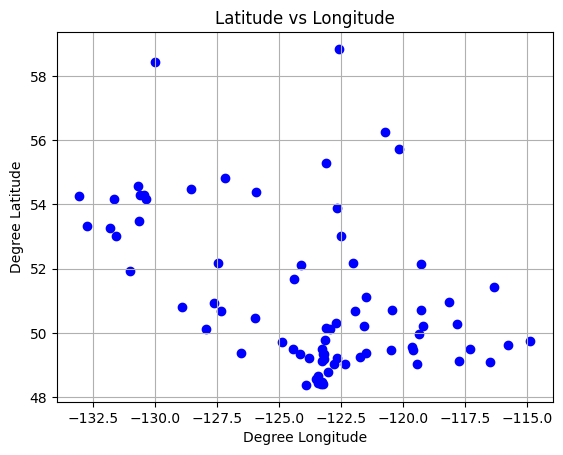

In [11]:
df = pd.DataFrame({'Latitude': DegreeLatitudes, 'Longitude': DegreeLongitudes, "station": Station})
plt.scatter(df["Longitude"], df["Latitude"], color='blue', marker='o')

# for i, city in enumerate(df["Stations"]):
#     plt.annotate(city, (df["Degree Longitude"][i], df["Degree Latitude"][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Degree Longitude')
plt.ylabel('Degree Latitude')
plt.title('Latitude vs Longitude')
plt.grid(True)
plt.show()

In [12]:
# Euclidean distance function
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

# Function to find the K nearest stations
def find_k_nearest_stations(station_name, k):
    if station_name not in df['station'].values:
        return f"Station {station_name} not found in the dataset."
    
    # Get the coordinates of the given station
    station_coords = df[df['station'] == station_name][['Latitude', 'Longitude']].values[0]
    lat1, lon1 = station_coords
    
    # Calculate the distance from the given station to all other stations
    df['distance'] = df.apply(lambda row: euclidean_distance(lat1, lon1, row['Latitude'], row['Longitude']), axis=1)
    
    # Sort the DataFrame by distance and get the K nearest stations
    nearest_stations = df[df['station'] != station_name].sort_values(by='distance').head(k)
    
    return nearest_stations[['station', 'Latitude', 'Longitude', 'distance']]


In [13]:
station_name = "ABBOTSFORD A"
k = 3
nearest_stations = find_k_nearest_stations(station_name, k)
print(nearest_stations)

            station  Latitude  Longitude  distance
42  PITT MEADOWS CS     49.21    -122.69  0.375899
75    WHITE ROCK CS     49.02    -122.78  0.420119
1       AGASSIZ RCS     49.24    -121.76  0.635689
